In [1]:
from google.colab import drive ; drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import re
import datetime


print(f"Numpy Version {np.__version__}")
print(f"Pandas Version {pd.__version__}")
print(f"Tensorflow Version {tf.__version__}")

Numpy Version 1.18.5
Pandas Version 1.1.3
Tensorflow Version 2.3.0


In [3]:
path = "/content/drive/My Drive/Sales_Data"
files = [file for file in os.listdir(path)if not file.startswith('.')]

FullData = pd.DataFrame()

for file in files:
  datamonth = pd.read_csv(path + "/" + file)
  FullData = pd.concat([FullData,datamonth],axis = 0)

FullData.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [4]:
FullData.to_csv("Fulldata.csv",index=False)

In [5]:
df = FullData.copy()

In [6]:
print(f"row {df.shape[0]} , Columns {df.shape[1]}" )
print(f"Contain Nans ? {df.isna().sum()}")


row 186850 , Columns 6
Contain Nans ? Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [7]:
df.dropna(how="all" , inplace=True)
print(f"Contain Nans ? {df.isna().sum()}")

Contain Nans ? Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [8]:
satanIndex = df[df["Purchase Address"] == "Purchase Address"].index
dfCleaned = df.drop(index=[satanIndex][0])
dfCleaned[dfCleaned["Purchase Address"] == "Purcgase Address"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
# Adding More columns
def get_city(text):
  return text.split(",")[1].strip(" ")
def get_state(text):
  return text.split(",")[2].split(" ")[1].strip(" ")

dfCleaned["city"] = dfCleaned["Purchase Address"].apply(lambda text: f"{get_city(text)}({get_state(text)})")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
dfCleaned = dfCleaned.drop(["Purchase Address"],axis = 1)
dfCleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,city
0,141234,iPhone,1,700,01/22/19 21:25,Boston(MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,Portland(OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,San Francisco(CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,Los Angeles(CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,Austin(TX)
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,San Francisco(CA)
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,San Francisco(CA)
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,Los Angeles(CA)
15224,176557,iPhone,1,700,03/30/19 12:32,San Francisco(CA)


In [11]:
# Grouping Data
dfCleaned["ordertime"] = dfCleaned["Order Date"].str[-5:]
dfCleaned["orderdate"] = dfCleaned["Order Date"].str[:8]
dfCleaned["month"] = dfCleaned["orderdate"].str[0:2]
dfCleaned.drop(["Order Date"],axis = 1, inplace = True)



In [12]:
def ConvertToDate(dateee):
  dateee = str(dateee)
  dateee = re.sub("/","-",dateee)
  return dateee


ConvertToDate("01/02/03") 



'01-02-03'

In [13]:
dfCleaned["day"] = dfCleaned["orderdate"].str[3:5]
dfCleaned["orderdate"] = dfCleaned["orderdate"].apply(ConvertToDate)
dfCleaned["orderdate"] = pd.to_datetime(dfCleaned["orderdate"])
dfCleaned["isStartMonth"] = dfCleaned["orderdate"].dt.is_month_start
dfCleaned["isEndMonth"] = dfCleaned["orderdate"].dt.is_month_end

In [14]:
dfCleaned["Sales"] = dfCleaned["Quantity Ordered"].astype("int") * dfCleaned["Price Each"].astype("float")
dfCleaned["Sales"]

0        700.00
1         14.95
2         23.98
3        149.99
4         11.99
          ...  
15221     14.95
15222    149.99
15223      8.97
15224    700.00
15225     14.95
Name: Sales, Length: 182735, dtype: float64

In [15]:
dfCleaned.columns = ["orderid","product","quantity_ordered","price_each","city","ordertime","orderdate","month","day","isStartMonth","isEndMonth","Sales"]

In [16]:
dfCleaned.quantity_ordered = dfCleaned["quantity_ordered"].astype("int")
dfCleaned.price_each = dfCleaned["price_each"].astype("float")

In [17]:
dfCleaned.groupby(["month"]).sum()

,quantity_ordered,price_each,isStartMonth,isEndMonth,Sales
month,,,,,
01,10670,1.776156e+06,330,271,1.786511e+06
02,13162,2.145209e+06,405,397,2.158127e+06
03,16697,2.740393e+06,460,459,2.755969e+06
04,20226,3.313522e+06,596,617,3.336376e+06
05,18344,3.084756e+06,509,465,3.101881e+06
06,14964,2.508863e+06,447,437,2.524465e+06
07,15781,2.572765e+06,469,475,2.587445e+06
08,13185,2.178184e+06,364,412,2.191698e+06
09,12827,2.038020e+06,372,373,2.050361e+06


From there we know that for these months[04 , 10 , 12] have 20K Quantity ordered, because in dec it has a lot special events ,such as christmas, end of the year . For  04 and 10 i dont know yet what caused these .

In [18]:
dfCleaned.groupby(["month"]).aggregate({np.sum,np.mean,np.median})["Sales"]

,median,mean,sum
month,,,
01,14.95,188.053820,1.786511e+06
02,14.95,184.046348,2.158127e+06
03,14.95,185.113474,2.755969e+06
04,14.95,185.519151,3.336376e+06
05,14.95,190.486431,3.101881e+06
06,14.95,189.923638,2.524465e+06
07,14.95,184.396017,2.587445e+06
08,14.95,187.020933,2.191698e+06
09,14.95,180.251539,2.050361e+06


In [19]:
dfCleaned.groupby(["month"]).aggregate({max,min})["Sales"]

,min,max
month,,
01,2.99,1999.98
02,2.99,1700.00
03,2.99,1700.00
04,2.99,3400.00
05,2.99,3400.00
06,2.99,3400.00
07,2.99,1700.00
08,2.99,1700.00
09,2.99,1700.00


In [20]:
len(dfCleaned.groupby(["day"]).head(1)) 

31

In [23]:
SkecthIt1 = dfCleaned.groupby(['day']).aggregate({np.sum,np.mean,np.median})[["quantity_ordered","Sales"]]

Text(0, 0.5, 'Total in 1K')

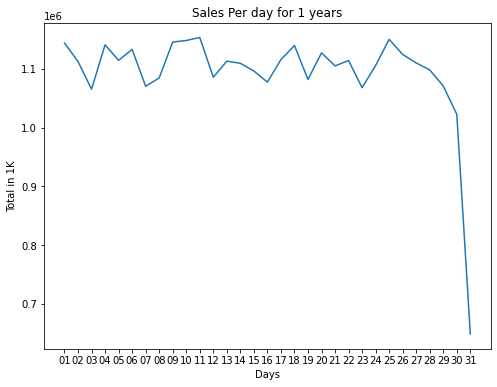

In [36]:
plt.figure(figsize=(8,6))
plt.plot(SkecthIt1[("Sales","sum")])
plt.title("Sales Per day for 1 years")
plt.xlabel ( 'Days' )
plt.ylabel ("Total in 1K")

[Text(0, 0.5, 'Total Sales in Usd'),
 Text(0.5, 0, 'Months'),
 Text(0.5, 1.0, 'Months Sales For 2019 ')]

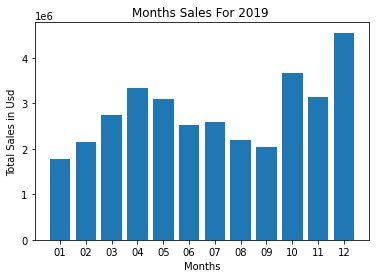

In [45]:
SkecthIt2 = dfCleaned.groupby(["month"]).aggregate({np.sum,np.mean,np.median})
fig, ax  = plt.subplots(1,1)
ax.bar(np.unique(dfCleaned["month"].values),SkecthIt2[("Sales","sum")])
ax.set(title = "Months Sales For 2019 ", xlabel = "Months" , ylabel = "Total Sales in Usd")

[Text(0, 0, 'Atlanta(GA)'),
 Text(0, 0, 'Austin(TX)'),
 Text(0, 0, 'Boston(MA)'),
 Text(0, 0, 'Dallas(TX)'),
 Text(0, 0, 'Los Angeles(CA)'),
 Text(0, 0, 'New York City(NY)'),
 Text(0, 0, 'Portland(ME)'),
 Text(0, 0, 'Portland(OR)'),
 Text(0, 0, 'San Francisco(CA)'),
 Text(0, 0, 'Seattle(WA)')]

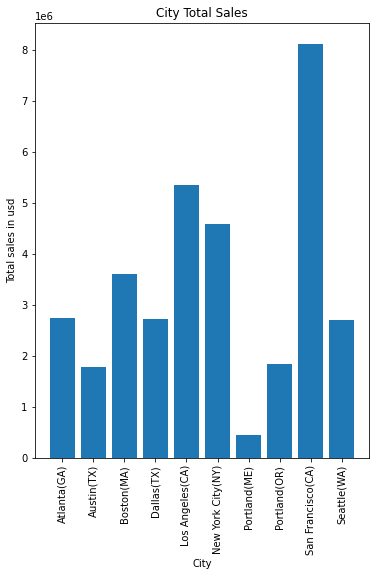

In [68]:
SkecthIt3 = dfCleaned.groupby(["city"]).aggregate({np.sum,np.median,np.mean})
fig, ax = plt.subplots ( 1, 1, figsize = (6,8))
ax.bar(np.unique(dfCleaned['city'].values) , SkecthIt3[("Sales","sum")])
ax.set(title = "City Total Sales",xlabel = 'City' ,ylabel = "Total sales in usd" )
ax.set_xticklabels(labels = np.unique(dfCleaned["city"].values),rotation = "vertical")



In [72]:
dfCleaned["Hour"] = dfCleaned["ordertime"].str[0:2]
dfCleaned["Minute"] = dfCleaned["ordertime"].str[3:5]
dfCleaned.head(1)[["Hour","Minute"]]

,Hour,Minute
0,21,25


[Text(0, 0, '00'),
 Text(0, 0, '01'),
 Text(0, 0, '02'),
 Text(0, 0, '03'),
 Text(0, 0, '04'),
 Text(0, 0, '05'),
 Text(0, 0, '06'),
 Text(0, 0, '07'),
 Text(0, 0, '08'),
 Text(0, 0, '09'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23')]

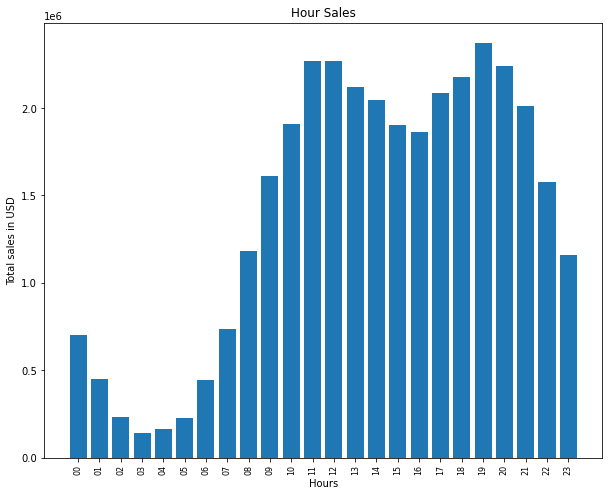

In [76]:
SkecthIt4 = dfCleaned.groupby(["Hour"]).aggregate({np.sum,np.median,np.mean})
fig,ax = plt.subplots(1,1, figsize = (10,8))
ax.bar(np.unique(dfCleaned["Hour"].values), SkecthIt4[("Sales","sum")])
ax.set(title = "Hour Sales",xlabel = "Hours" , ylabel = "Total sales in USD")
ax.set_xticklabels(labels = np.unique(dfCleaned["Hour"].values), rotation = "vertical" , size = 8)


[Text(0, 0, '00'),
 Text(0, 0, '01'),
 Text(0, 0, '02'),
 Text(0, 0, '03'),
 Text(0, 0, '04'),
 Text(0, 0, '05'),
 Text(0, 0, '06'),
 Text(0, 0, '07'),
 Text(0, 0, '08'),
 Text(0, 0, '09'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23')]

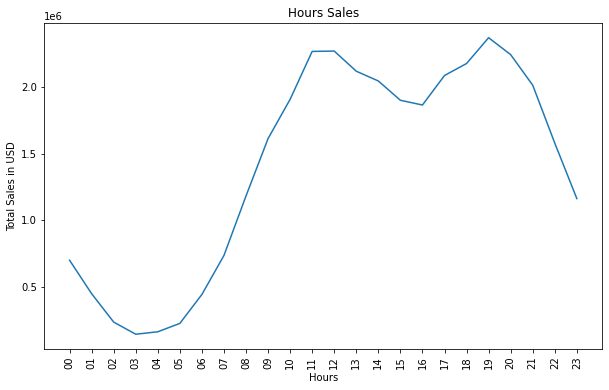

In [86]:
fig,ax = plt.subplots(1,1, figsize = (10,6))
ax.plot(np.unique(dfCleaned["Hour"].values), SkecthIt4[("Sales","sum")])
ax.set(title = "Hours Sales" , xlabel = "Hours" , ylabel = "Total Sales in USD")
ax.set_xticklabels(labels = np.unique(dfCleaned["Hour"].values),rotation = "vertical")

In [88]:
dfCleaned.head(1)

,orderid,product,quantity_ordered,price_each,city,ordertime,orderdate,month,day,isStartMonth,isEndMonth,Sales,Hour,Minute
0,141234,iPhone,1,700.0,Boston(MA),21:25,2019-01-22,01,22,False,False,700.0,21,25


In [91]:
NODuplicateDf = dfCleaned[dfCleaned["orderid"].duplicated(keep = False)]
NODuplicateDf.head()

,orderid,product,quantity_ordered,price_each,city,ordertime,orderdate,month,day,isStartMonth,isEndMonth,Sales,Hour,Minute
41,141275,USB-C Charging Cable,1,11.95,Austin(TX),16:06,2019-01-07,01,07,False,False,11.95,16,06
42,141275,Wired Headphones,1,11.99,Austin(TX),16:06,2019-01-07,01,07,False,False,11.99,16,06
57,141290,Apple Airpods Headphones,1,150.00,Los Angeles(CA),08:25,2019-01-02,01,02,False,False,150.00,08,25
58,141290,AA Batteries (4-pack),3,3.84,Los Angeles(CA),08:25,2019-01-02,01,02,False,False,11.52,08,25
133,141365,Vareebadd Phone,1,400.00,New York City(NY),11:19,2019-01-10,01,10,False,False,400.00,11,19


In [101]:
Sketchit5 = NODuplicateDf.groupby(["orderid"])["product"].apply(lambda text : ",".join(text))

In [119]:
def count_it_m8(data):
  datanya = {}
  for keys, val in data.items():
    val = val.lower()
    if val not in datanya:
      datanya[val] = 1
    elif val in datanya:
      datanya[val] = datanya[val] + 1
  return datanya
lol = count_it_m8(Sketchit5)

In [134]:
Ans = sorted(lol,key = lol.get,reverse=True)[:20]
for keys,val in lol.items():
  if keys in Ans:
    index = 0
    for item in Ans:
      if item == keys:
        Ans[index] = (keys,val)
      else:
        index = index + 1

Ans

[('iphone,lightning charging cable', 860),
 ('google phone,usb-c charging cable', 828),
 ('iphone,wired headphones', 355),
 ('vareebadd phone,usb-c charging cable', 301),
 ('google phone,wired headphones', 295),
 ('iphone,apple airpods headphones', 274),
 ('google phone,bose soundsport headphones', 160),
 ('vareebadd phone,wired headphones', 104),
 ('google phone,usb-c charging cable,wired headphones', 74),
 ('vareebadd phone,bose soundsport headphones', 56),
 ('lightning charging cable,usb-c charging cable', 55),
 ('iphone,lightning charging cable,wired headphones', 53),
 ('lightning charging cable,lightning charging cable', 51),
 ('lightning charging cable,aa batteries (4-pack)', 50),
 ('aa batteries (4-pack),lightning charging cable', 49),
 ('aaa batteries (4-pack),usb-c charging cable', 48),
 ('aa batteries (4-pack),aaa batteries (4-pack)', 47),
 ('aaa batteries (4-pack),aaa batteries (4-pack)', 46),
 ('usb-c charging cable,usb-c charging cable', 45),
 ('aaa batteries (4-pack),ligh

[Text(0, 0.5, 'Mean In USD')]

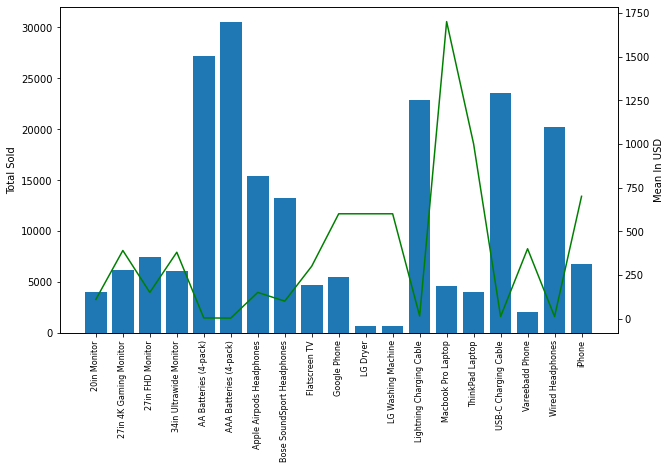

In [150]:
Sketchit6 = dfCleaned.groupby(["product"]).aggregate({np.sum,np.median,np.mean})
fig,ax = plt.subplots(1, 1,figsize = (10,6))
ax.bar(np.unique(dfCleaned["product"].values),Sketchit6[("quantity_ordered","sum")])
ax.set_xticklabels(labels = np.unique(dfCleaned["product"]),rotation = "vertical",size = 8)
ax.set(ylabel = "Total Sold")

ax2= ax.twinx()
ax2.plot(np.unique(dfCleaned["product"].values), Sketchit6[("price_each","mean")],color="green")
ax2.set(ylabel = "Mean In USD")